In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("../../../src")

import nanonets_utils

# data_folderA = "/home/jonas/phd/data/controls_setupA/"
data_folderA = "/home/j/j_mens07/phd/data/1_funding_period/potential/electrode_pos/setupA/"
# data_folderB = "/home/jonas/phd/data/controls_setupB/"
data_folderB = "/home/j/j_mens07/phd/data/1_funding_period/potential/electrode_pos/setupB/"

In [2]:
# Parameter
N_valsA = [6,8,10,12]
N_keysA = len(N_valsA)
N_valsB = [4,6,8,10,12]
N_keysB = len(N_valsB)
N_np    = 9

# Boolean On and Off
off_statesA = np.array(N_keysA*[0.0])
off_statesB = np.array(N_keysB*[0.0])
on_statesA  = np.array(N_keysA*[0.01])
on_statesB  = np.array(N_keysB*[0.01])

dataA       = nanonets_utils.load_boolean_results(folder=data_folderA, N=N_np, N_e=N_valsA, input_cols=['E1','E2'])
dataB       = nanonets_utils.load_boolean_results(folder=data_folderB, N=N_np, N_e=N_valsB, input_cols=['E1','E2'])

## Fitness Abundance

In [3]:
fitnessA    = {N : nanonets_utils.fitness(df=dataA[N], input_cols=['E1','E2'], delta=0.0) for N in N_valsA}
abundanceA  = {N : nanonets_utils.abundance(df=fitnessA[N]) for N in N_valsA}

fitnessB    = {N : nanonets_utils.fitness(df=dataB[N], input_cols=['E1','E2'], delta=0.0) for N in N_valsB}
abundanceB  = {N : nanonets_utils.abundance(df=fitnessB[N]) for N in N_valsB}

In [24]:
fitness = pd.DataFrame()

for j, N in enumerate(N_valsA): 

    df          = pd.melt(fitnessA[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['key']   = f'A{N-3}'
    fitness     = pd.concat([fitness, df], ignore_index=True)

for j, N in enumerate(N_valsB[::-1][0:-1]):
    
    df          = pd.melt(fitnessB[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['key']   = f'B{N-3}'
    fitness     = pd.concat([fitness, df], ignore_index=True)

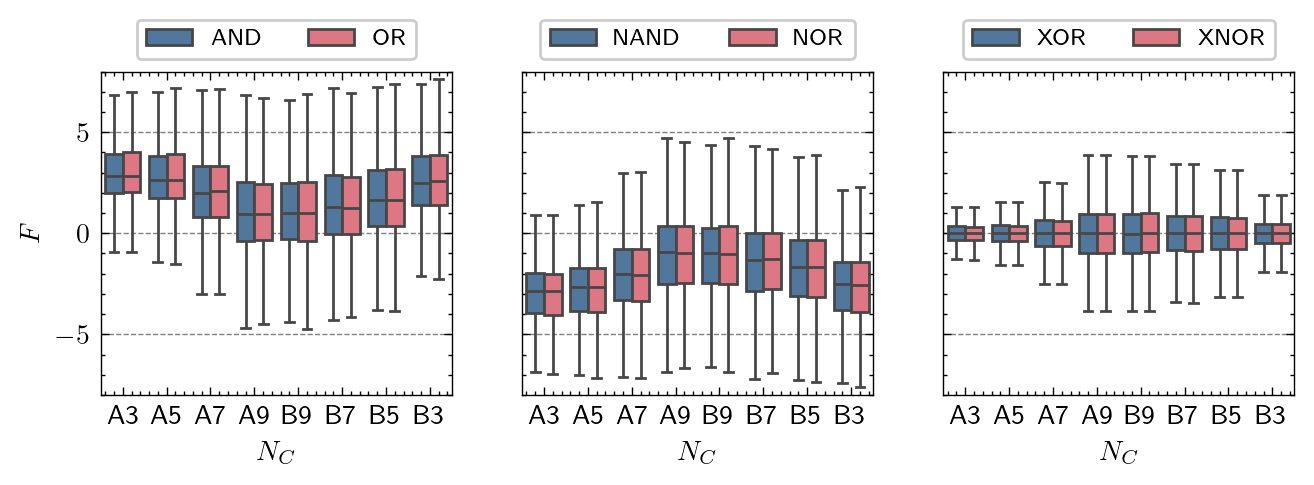

In [25]:
with plt.style.context(["science","bright", "grid"]):
    
    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2.2)
    fig.set_figheight(fig.get_figheight()*0.8)

    ax  = fig.add_subplot(1,3,1)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='AND Fitness') | (fitness['Gate']=='OR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_ylabel("$F$")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('AND')
    l.get_texts()[1].set_text('OR')

    ax  = fig.add_subplot(1,3,2)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='NAND Fitness') | (fitness['Gate']=='NOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_yticklabels("")
    ax.set_ylabel("")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('NAND')
    l.get_texts()[1].set_text('NOR')

    ax  = fig.add_subplot(1,3,3)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='XOR Fitness') | (fitness['Gate']=='XNOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_yticklabels("")
    ax.set_ylabel("")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('XOR')
    l.get_texts()[1].set_text('XNOR')

## Nonlinear Parameter

In [6]:
x_vals  = ['A3','A5','A7','A9','B9','B7','B5','B3']

# Current Relations
paramsA = {N : nanonets_utils.nonlinear_parameter(dataA[N], input1_column='E1', input2_column='E2') for i, N in enumerate(N_valsA)}
paramsB = {N : nanonets_utils.nonlinear_parameter(dataB[N], input1_column='E1', input2_column='E2') for i, N in enumerate(N_valsB[1:])}

# NDR
Q_ndr_l = np.array([nanonets_utils.return_ndr(paramsA[N]['Ml']) for N in N_valsA])
Q_ndr_r = np.array([nanonets_utils.return_ndr(paramsA[N]['Mr']) for N in N_valsA])
Q_ndrA  = (Q_ndr_l + Q_ndr_r) / 2

# NDR
Q_ndr_l = np.array([nanonets_utils.return_ndr(paramsB[N]['Ml']) for N in N_valsB[1:]])
Q_ndr_r = np.array([nanonets_utils.return_ndr(paramsB[N]['Mr']) for N in N_valsB[1:]])
Q_ndrB  = (Q_ndr_l + Q_ndr_r) / 2
Q_ndr   = np.append(Q_ndrA, Q_ndrB[::-1])

# NLS
bins    = 100
Q_nlsA  = np.array([nanonets_utils.return_nls(df=paramsA[N], bins=bins) for N in N_valsA])
Q_nlsB  = np.array([nanonets_utils.return_nls(df=paramsB[N], bins=bins) for N in N_valsB[1:]])
Q_nls   = np.append(Q_nlsA, Q_nlsB[::-1])

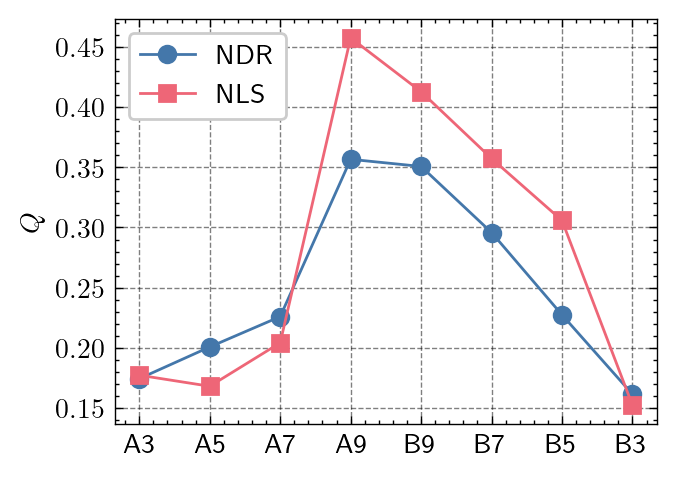

In [37]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(x_vals, Q_ndr, '-o', label='NDR')
    ax.plot(x_vals, Q_nls, '-s', label='NLS')

    ax.set_ylabel('$Q$')
    ax.legend(loc='upper left')

---

## Relative Error

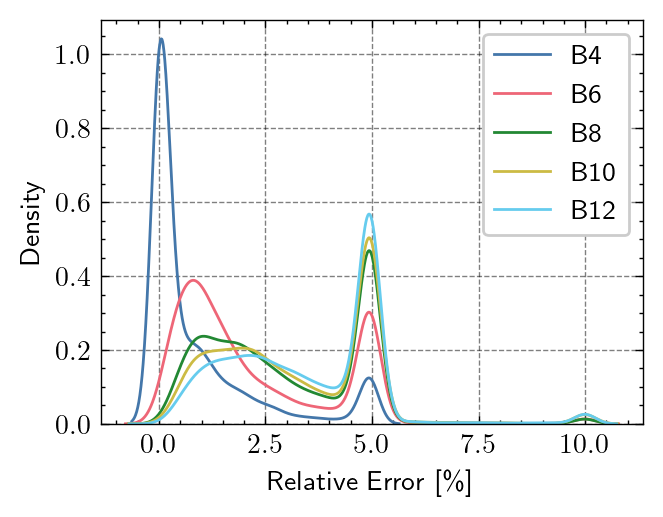

In [69]:
rel_errors  = [((dataB[key]['Error']/dataB[key]['Current']).abs().values) for key in dataB.keys()]

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for vals in rel_errors:
        vals            = np.array(vals)
        vals[vals>0.1]  = 0.1
        ax              = sns.kdeplot(vals*100, ax=ax, legend=False, gridsize=1000)
    
    ax.set_xlabel('Relative Error [\%]')
    ax.legend([f"B{i}" for i in dataB.keys()])

In [42]:
dataB[4].sort_values(by='Jumps')

,E0,E1,E2,E3,G,Eq_Jumps,Jumps,Current,Error
6856,-0.032223,0.00,0.00,0.0,0.0,100000.0,12484.0,-0.001741,8.320476e-07
6868,-0.031694,0.00,0.00,0.0,0.0,100000.0,40609.0,-0.001727,2.063979e-07
7927,0.051711,0.01,0.01,0.0,0.0,100000.0,50000.0,0.019815,5.350831e-05
7906,0.051535,0.01,0.00,0.0,0.0,100000.0,50000.0,0.018837,2.140071e-05
7905,0.051535,0.00,0.01,0.0,0.0,100000.0,50000.0,0.018872,1.079277e-06
...,...,...,...,...,...,...,...,...,...
6779,-0.034075,0.01,0.01,0.0,0.0,100000.0,3560000.0,-0.000395,1.976575e-05
6855,-0.032485,0.01,0.01,0.0,0.0,100000.0,3585000.0,-0.000260,1.299860e-05
6843,-0.033187,0.01,0.01,0.0,0.0,100000.0,3630000.0,-0.000303,1.511901e-05
6847,-0.032996,0.01,0.01,0.0,0.0,100000.0,3680000.0,-0.000280,1.400417e-05
